In [1]:
import spacy
import spacy.cli
from scipy import spatial
spacy.cli.download("en_core_web_md")
nlp = spacy.load('en_core_web_md')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
import pandas as pd
import numpy as np
import pickle

IMDB database loading

In [3]:
# Mounting the google drive to google colab in order to load the data files directly from it
from google.colab import drive
drive.mount('/content/drive')
imdb_df = pd.read_csv("/content/drive/MyDrive/EPITA_NLP/Course2/IMDB Dataset.csv")

Mounted at /content/drive


In [4]:
# These data from IMDB correspond to movie review, with sentiment (postive/negative) labels
imdb_df.head

<bound method NDFrame.head of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [5]:
len(imdb_df)

50000

## Preprocessing of the data

We get the IMDB dataset

Here is the original code to transform the texts into 300-dimension embedding vectors with spaCy pretrained model.
However, in order to save most of the computation time needed, we just do the operation **on a small subsample** of the complete data. On the **next cells**, we load directly the **embedding already computed on all the data** to use it directly.

Let's have a look to an example of review

In [6]:
review_example = imdb_df["review"][0]
review_example

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

Let's see how to use spaCy to turn it into a 300-dimension **text** embedding vector

In [7]:
text_embedding_example =  nlp(review_example).vector
text_embedding_example

array([-1.7504832 ,  0.7022312 , -2.2606955 , -0.25216776,  3.1044924 ,
        0.4088493 ,  0.6950028 ,  4.064594  , -0.77833825, -0.5599303 ,
        5.818849  ,  1.2435583 , -3.185892  ,  1.6606688 ,  1.2544451 ,
        1.1684904 ,  0.935875  , -0.63201183, -1.2186621 , -2.1508455 ,
        1.5870844 , -0.6758026 , -1.5404006 , -0.69165254, -0.93915576,
       -1.6277498 , -2.2179518 , -0.9410419 , -0.66431314,  1.0517935 ,
        0.54725   , -0.71588236, -1.0868866 , -1.569482  , -2.1426454 ,
       -0.33219552, -0.8548736 ,  1.2894645 ,  2.159874  ,  0.96553254,
        0.03616931,  0.46264178, -0.15097934, -0.10410909, -1.6469684 ,
        1.9485283 ,  0.9730775 , -3.0353575 , -0.9143968 ,  1.729392  ,
       -0.9954632 ,  1.5305079 ,  0.4312649 , -4.2520585 , -1.2822261 ,
        0.6028667 ,  0.351776  ,  1.2622427 ,  1.2374928 ,  0.23456438,
        0.87877184, -0.9261303 , -0.44194898, -1.991197  ,  1.4620265 ,
        1.3037717 , -2.9856899 , -3.0468397 ,  0.9662817 ,  2.38

In [8]:
text_embedding_example.shape

(300,)

As explained just before, we only compute the embedding on the 100 first elements in order to avoid a too long computation time

In [9]:
size_data = 100#len(test_df)
list_embed = [float('nan')] * size_data
list_label = [float('nan')] * size_data

compt = 0
for sentence in list(imdb_df.itertuples())[0:size_data]:
    text_embed = nlp(sentence.review).vector
    observed_sentiment = sentence.sentiment
    if  observed_sentiment=="positive":
      label = 1.0
    else:
      label = 0.0
    list_embed[compt] = np.asarray(text_embed, dtype ="float32").reshape(1,300)
    list_label[compt] = label
    compt += 1

In [10]:
print(list_label)

[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]


In [11]:
len(list_embed)

100

To save time processing, we download the **embeddings already computed on the complete dataset**. It may take some time anyway but it is still much less than doing the whole operation once again.

In [12]:
df_imdb_embed_label = pd.read_pickle("/content/drive/MyDrive/EPITA_NLP/Course2/df_imdb_embed_label.pkl")
list_embed = list(df_imdb_embed_label["embedding"])
list_label = list(df_imdb_embed_label["label"])

We reformat the data to make it directly usable into the SVM procedure

We only consider at first a subset of the data to enable a fast training at first

In [13]:
n_dim_embedding = 300 # size of the spaCy text embedding, cannot be changed
size_train = 9000 # size of the train data considered, can be changed later
size_test = 1000 # size of the test data considered

array_embed_train = np.asarray(list_embed[0:size_train]).reshape(size_train,n_dim_embedding)
array_label_train = np.asarray(list_label[0:size_train])

array_embed_test = np.asarray(list_embed[size_train:(size_train+ size_test)]).reshape(size_test,n_dim_embedding)
array_label_test = np.asarray(list_label[size_train:(size_train+ size_test)])

## Support Vector Machine training

**Support Vector Machines** (SVMs) are a supervised machine learning classification algorithm. The goal is to find the hyper-plan which achieves the "best" separation between the different class. "Best" here should be understood as the separation maximizing the distance between the nearest data on each side. 

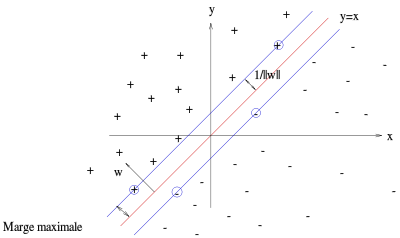

SVM model training (we use the implementation from the sklearn library)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [14]:
from sklearn import svm
clf = svm.SVC()
clf.fit(array_embed_train, array_label_train)

SVC()

Predictions on the test set

In [15]:
resu = clf.predict(array_embed_test)

Evaluation of the model (with a classical "for" loop)

In [16]:
compt = 0
for elem1, elem2 in zip(resu,array_label_test):
  compt += int(elem1 == elem2)

print(compt/len(resu) * 100)

84.3


Evaluation of the model (with a more efficient *list comprehension*)

In [17]:
sum([int(elem1 == elem2) for elem1, elem2 in zip(resu,array_label_test)])/len(resu) * 100

84.3

## Sentiment Analysis with Vader library

In [18]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Creation of a SentimentIntensityAnalyzer object

In [19]:
sid_obj = SentimentIntensityAnalyzer()

This library is specifically train to analyse social media text. To illustrate this, we can test on classic smiley texts.

In [20]:
happy_smiley = ":)"
print(f"We can try on the happy smiley: {happy_smiley}")
print(sid_obj.polarity_scores(happy_smiley))
sad_smiley = ":("
print(f"We can try on the sad smiley: {sad_smiley}")
print(sid_obj.polarity_scores(sad_smiley))

We can try on the happy smiley: :)
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}
We can try on the sad smiley: :(
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}


If compound is above 0 that means the sentiment is positive, unless it is negative. 

We test directly on IMDB dataset, and we compare the predicted values with the ground truth given directly into the original dataset

In [21]:
list_vader_test = []
for sentence in imdb_df.itertuples():
    sentiment_dict = sid_obj.polarity_scores(sentence.review)
    observed_sentiment = sentence.sentiment
    predicted_sentiment = sentiment_dict['compound']
    if (predicted_sentiment>=0 and observed_sentiment=="positive") or (predicted_sentiment<0 and observed_sentiment=="negative"):
      prediction = True
    else:
      prediction = False
    list_vader_test.append(prediction)

In [22]:
list_vader_test[0:10]

[False, True, True, True, True, True, True, False, False, True]

We can check the rate of good prediction rate with this pre-trained Vader model

In [23]:
rate_success = list_vader_test.count(True)/len(list_vader_test) * 100
print(f"Good prediction rate: {int(rate_success)}%")

Good prediction rate: 69%
